# Create dataset from picture-based subreddit

## All-time top post
I used [praw](https://praw.readthedocs.io/en/latest/) library to get the image link from top 200 of all-time top post from 10 picture-based subreddit. Photo-based Subreddit that are included in dataset 

### List of subreddit included in dataset

* [r/AbandonedPorn](https://www.reddit.com/r/AbandonedPorn)
* [r/AccidentalWesAnderson](https://www.reddit.com/r/AccidentalWesAnderson)
* [r/astrophotography](https://www.reddit.com/r/astrophotography)
* [r/aww](https://www.reddit.com/r/aww)
* [r/carporn](https://www.reddit.com/r/carporn)
* [r/EarthPorn](https://www.reddit.com/r/EarthPorn)
* [r/Foodporn](https://www.reddit.com/r/Foodporn)
* [r/roomporn](https://www.reddit.com/r/roomporn)
* [r/thewaywewere](https://www.reddit.com/r/thewaywewere)

In [1]:
from fastai import *
from fastai.vision import *

### View Data

In [2]:
path = Path('data')

In [3]:
classes = [
    'AbandonedPorn',
    'AccidentalWesAnderson',
    'AccidentalRenaissance',
    'astrophotography',
    'aww',
    'carporn',
    'EarthPorn',
    'Foodporn',
    'roomporn',
    'thewaywewere',
      ]

In [4]:
np.random.seed(555)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [5]:
len(data.classes), data.classes

(10,
 ['AbandonedPorn',
  'AccidentalRenaissance',
  'AccidentalWesAnderson',
  'EarthPorn',
  'Foodporn',
  'astrophotography',
  'aww',
  'carporn',
  'roomporn',
  'thewaywewere'])

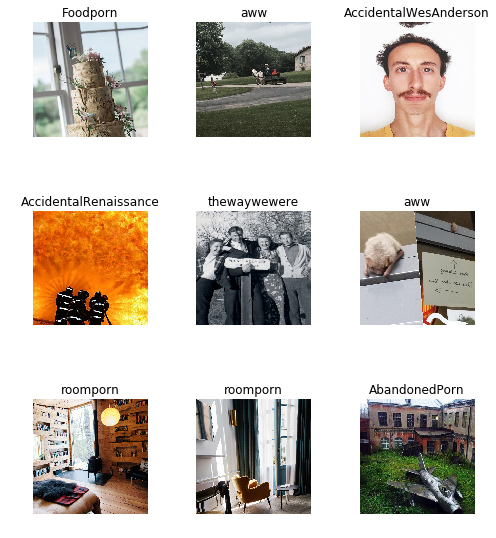

In [6]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
len(data.train_ds), len(data.valid_ds)

(1408, 361)

### Train Model

In [8]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [9]:
learn.fit_one_cycle(4)

Total time: 07:51
epoch  train_loss  valid_loss  accuracy
1      1.674049    0.648786    0.795014  (01:57)
2      1.031734    0.483817    0.833795  (02:04)
3      0.726439    0.455209    0.847645  (01:59)
4      0.558974    0.456300    0.853186  (01:50)



In [10]:
learn.save('stage-1')

In [22]:
learn.load('stage-1')

In [23]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


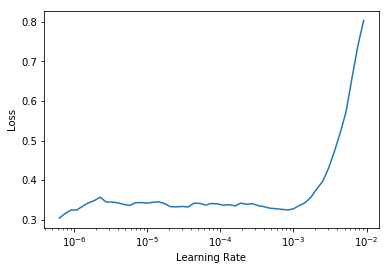

In [14]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(4, max_lr=slice(2e-6,3e-4))

Total time: 07:48
epoch  train_loss  valid_loss  accuracy
1      0.355923    0.445816    0.847645  (01:51)
2      0.317966    0.424755    0.858726  (02:00)
3      0.281616    0.419949    0.855956  (01:55)
4      0.254773    0.416450    0.867036  (02:00)



In [25]:
learn.save('stage-2')

## Interpretation

In [26]:
learn.load('stage-2')

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

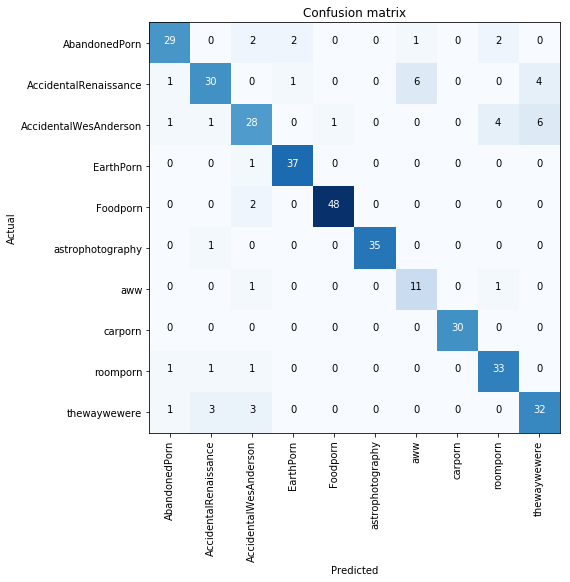

In [28]:
interp.plot_confusion_matrix(figsize=(8,8))

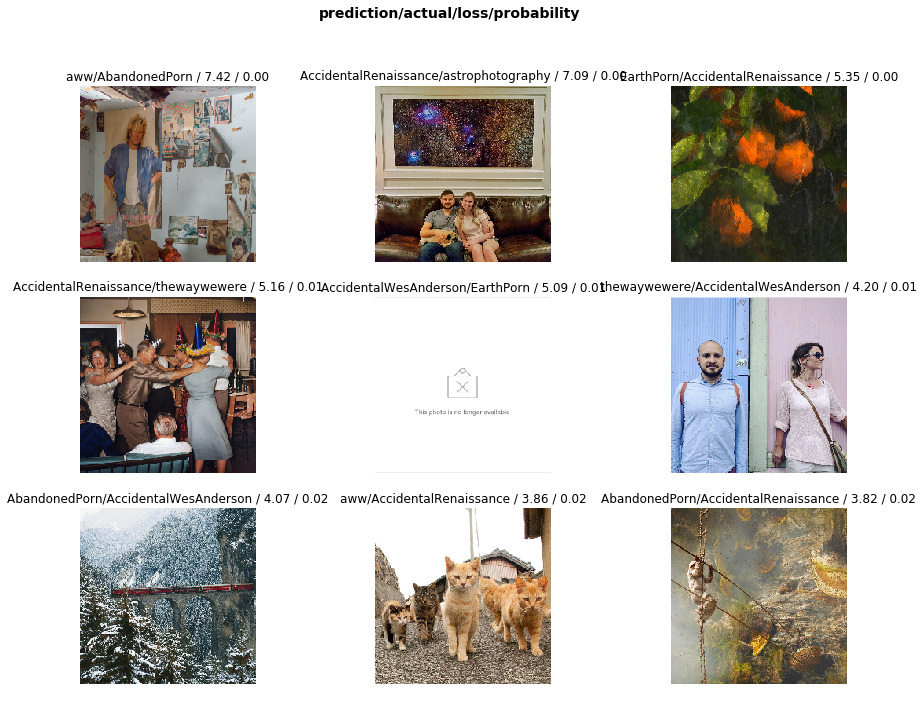

In [29]:
interp.plot_top_losses(9, figsize=(15, 11))

In [30]:
interp.most_confused(min_val=2)

[('AccidentalRenaissance', 'aww', 6),
 ('AccidentalWesAnderson', 'thewaywewere', 6),
 ('AccidentalRenaissance', 'thewaywewere', 4),
 ('AccidentalWesAnderson', 'roomporn', 4),
 ('thewaywewere', 'AccidentalRenaissance', 3),
 ('thewaywewere', 'AccidentalWesAnderson', 3)]

### Top losses and most confused

`plot_top_losses #return prediction, actual, loss, prob of actual` 

the general concept of images from for example, r/thewaywewere and r/historyporn or r/spaceporn and r/astrophotography are quite similar.

## Training: resnet50

In [31]:
data = data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [34]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

In [35]:
learn.fit_one_cycle(8)

Total time: 14:39
epoch  train_loss  valid_loss  accuracy
1      1.234869    0.478822    0.837758  (01:47)
2      0.773142    0.476130    0.834808  (01:50)
3      0.563901    0.449300    0.834808  (01:51)
4      0.440405    0.510011    0.852507  (01:50)
5      0.356365    0.489577    0.864307  (01:48)
6      0.277814    0.462683    0.855457  (01:49)
7      0.218212    0.435652    0.870206  (01:47)
8      0.174883    0.434666    0.867257  (01:53)



In [36]:
learn.save('stage-1-50')

In [37]:
learn.load('stage-1-50')

In [38]:
learn.unfreeze()

In [39]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


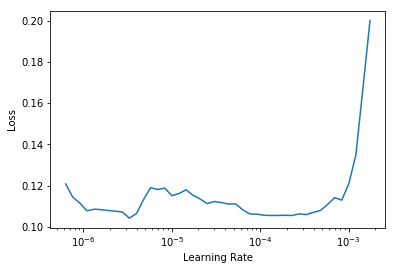

In [41]:
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(4, max_lr=slice(6e-6, 6e-5))

Total time: 07:18
epoch  train_loss  valid_loss  accuracy
1      0.108344    0.440079    0.858407  (01:49)
2      0.102726    0.439076    0.858407  (01:49)
3      0.090217    0.435006    0.861357  (01:49)
4      0.085011    0.447564    0.858407  (01:49)



In [43]:
learn.save('stage-2-50')

In [44]:
interp = ClassificationInterpretation.from_learner(learn)

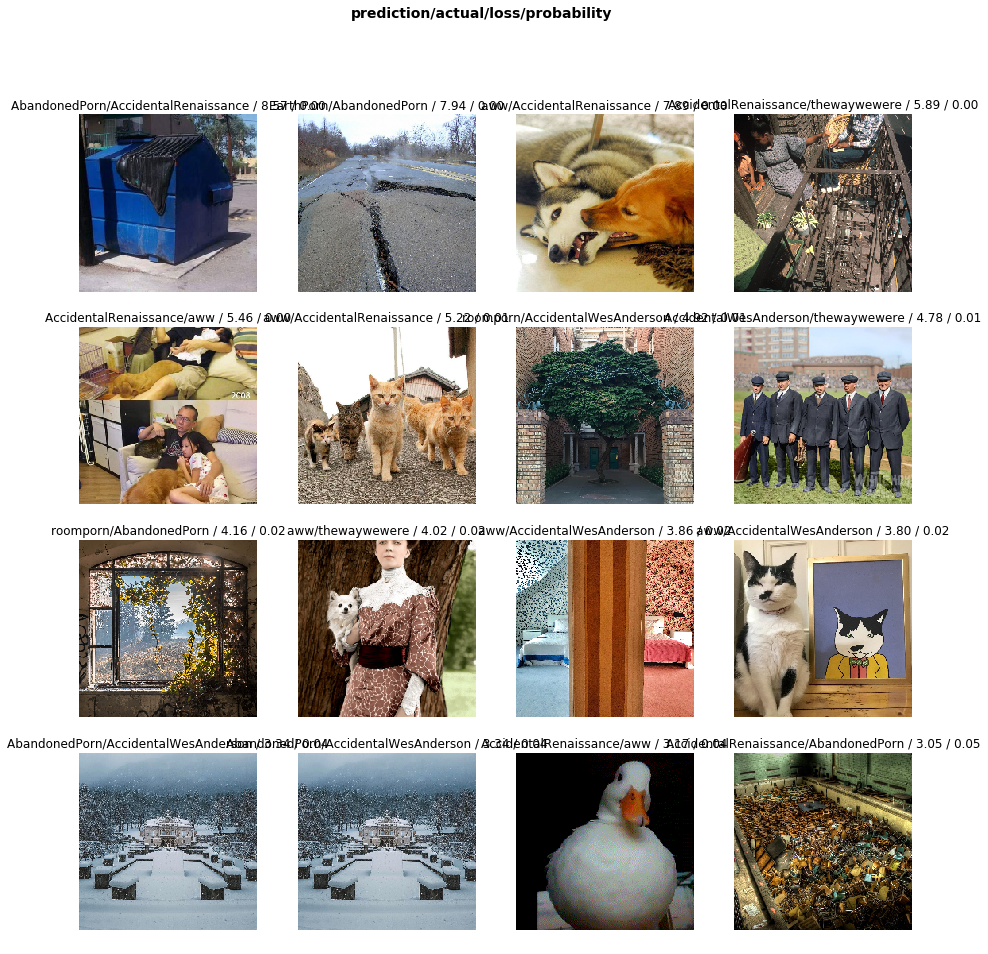

In [45]:
interp.plot_top_losses(16, figsize=(15,15))

In [46]:
interp.most_confused()

[('AccidentalWesAnderson', 'aww', 5),
 ('AbandonedPorn', 'roomporn', 4),
 ('aww', 'AccidentalRenaissance', 4),
 ('thewaywewere', 'AccidentalRenaissance', 4),
 ('AbandonedPorn', 'AccidentalWesAnderson', 3),
 ('AccidentalRenaissance', 'aww', 3),
 ('AccidentalWesAnderson', 'AbandonedPorn', 3),
 ('AbandonedPorn', 'EarthPorn', 2),
 ('AccidentalRenaissance', 'AccidentalWesAnderson', 2),
 ('thewaywewere', 'aww', 2)]

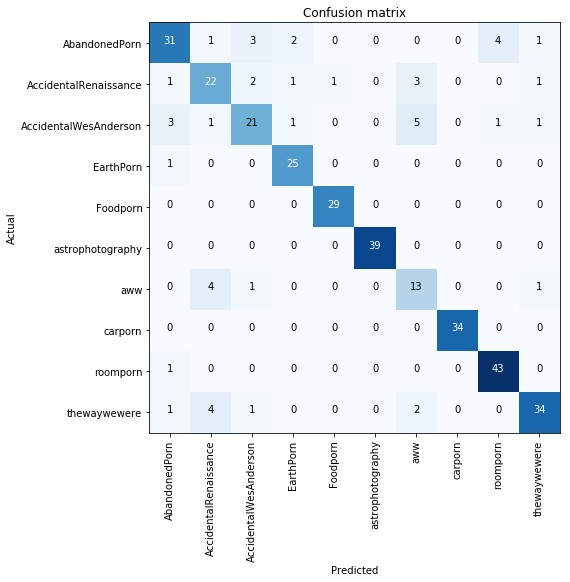

In [47]:
interp.plot_confusion_matrix(figsize=(8,8))

# try resnet50 with less epoch

In [48]:
data = data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [49]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

In [50]:
learn.fit_one_cycle(2)

Total time: 03:44
epoch  train_loss  valid_loss  accuracy
1      1.063722    0.451273    0.855932  (01:55)
2      0.679467    0.430846    0.853107  (01:48)



In [51]:
learn.save('stage-1-50-le')

In [52]:
learn.load('stage-1-50-le')

In [53]:
learn.unfreeze()

In [54]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


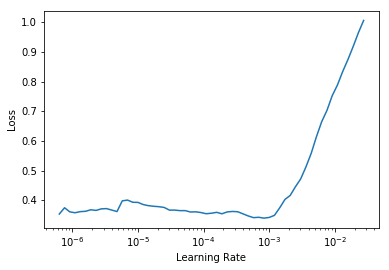

In [55]:
learn.recorder.plot()

In [56]:
learn.fit_one_cycle(4, max_lr=slice(8e-6, 1e-4))

Total time: 07:26
epoch  train_loss  valid_loss  accuracy
1      0.386404    0.410015    0.864407  (01:51)
2      0.350281    0.405953    0.875706  (01:46)
3      0.313984    0.406797    0.875706  (01:55)
4      0.260550    0.409499    0.875706  (01:53)



In [57]:
learn.save('stage-2-50-le')

In [58]:
interp = ClassificationInterpretation.from_learner(learn)

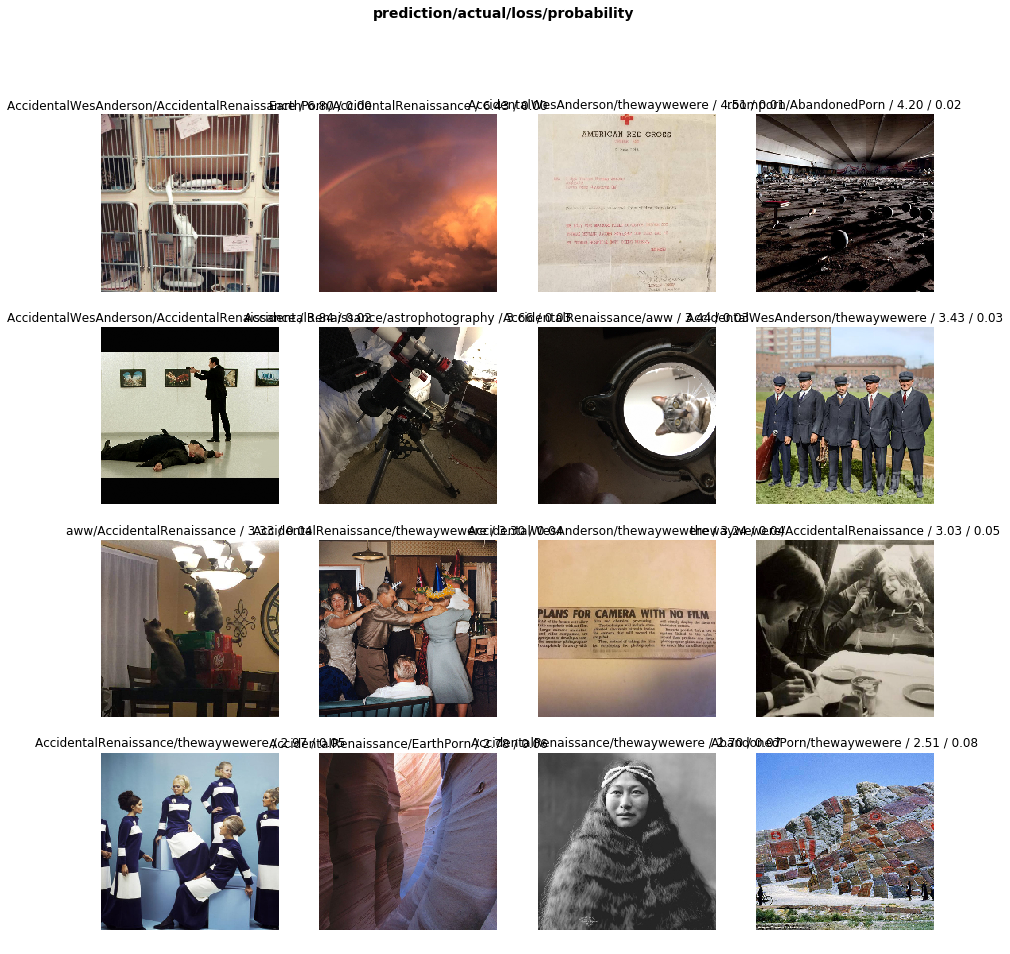

In [59]:
interp.plot_top_losses(16, figsize=(15,15))

In [60]:
interp.most_confused()

[('thewaywewere', 'AccidentalWesAnderson', 7),
 ('AccidentalRenaissance', 'aww', 6),
 ('thewaywewere', 'AccidentalRenaissance', 5),
 ('AbandonedPorn', 'AccidentalWesAnderson', 2),
 ('AbandonedPorn', 'roomporn', 2),
 ('AccidentalRenaissance', 'AccidentalWesAnderson', 2),
 ('AccidentalRenaissance', 'thewaywewere', 2),
 ('AccidentalWesAnderson', 'aww', 2),
 ('EarthPorn', 'AbandonedPorn', 2),
 ('EarthPorn', 'AccidentalRenaissance', 2)]

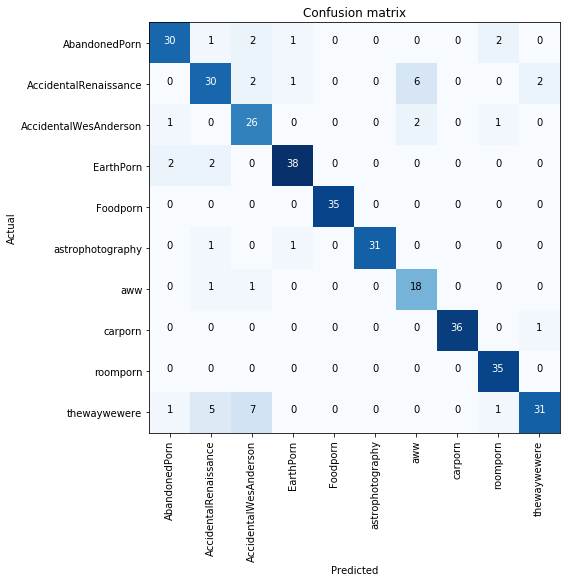

In [61]:
interp.plot_confusion_matrix(figsize=(8,8))